# 1. Setup & Bus Data Load

Import required modules and packages.

In [1]:
# import os so that environment variables can be accessed (for database password, etc.)
import os

# import mysql connector so that data can be pulled into the notebook directly from the database
import mysql.connector

# import pandas and numpy for data analysis
import pandas as pd
import numpy as np

# import matplotlib & seaborn for plotting and visualisaion
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# import transform_data function for transforming data into segment format
from transform_data import transform_data

# import convert_timestamp for various timestamp conversion functions
import convert_timestamp

Set the max number of columns & rows to display.

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)

Load data for a bus route from file.

In [3]:
df = pd.read_csv('./data/route_15A.csv', sep=";", na_values=['\\N'])

Perform a check to see how many rows and columns are in the file.

In [4]:
rows = df.shape[0]
cols = df.shape[1]
print()
print("Before any data cleaning, the CSV file contains", rows, "rows and", cols, "columns.")
print()


Before any data cleaning, the CSV file contains 1233049 rows and 34 columns.



Print the first five lines of the dataframe.

In [5]:
df.head(5)

,datasource,dayofservice,tripid,lineid,routeid,direction,plannedtime_arr_trip,plannedtime_dep_trip,actualtime_arr_trip,actualtime_dep_trip,basin,tenderlot,suppressed_trip,justificationid_trip,lastupdate_trip,note_trip,progrnumber,stoppointid,plannedtime_arr_stop,plannedtime_dep_stop,actualtime_arr_stop,actualtime_dep_stop,vehicleid,passengers,passengersin,passengersout,distance_leavetimes,suppressed_leavetimes,justificationid_leavetimes,lastupdate_leavetimes,note_leavetimes,distance_vehicle,minutes_vehicle,note_vehicle
0,DB,2018-01-01 00:00:00,5962073,15A,15A_83,1,33818,32400,34046.0,32665.0,BasDef,NaN,NaN,NaN,2018-01-08 17:21:10,",2988631,",1,395,32400,32400,32665,32665,2868403,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN,215511,53152,NaN
1,DB,2018-01-01 00:00:00,5962073,15A,15A_83,1,33818,32400,34046.0,32665.0,BasDef,NaN,NaN,NaN,2018-01-08 17:21:10,",2988631,",2,396,32438,32438,32688,32688,2868403,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN,215511,53152,NaN
2,DB,2018-01-01 00:00:00,5962073,15A,15A_83,1,33818,32400,34046.0,32665.0,BasDef,NaN,NaN,NaN,2018-01-08 17:21:10,",2988631,",3,397,32459,32459,32708,32708,2868403,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN,215511,53152,NaN
3,DB,2018-01-01 00:00:00,5962073,15A,15A_83,1,33818,32400,34046.0,32665.0,BasDef,NaN,NaN,NaN,2018-01-08 17:21:10,",2988631,",4,398,32490,32490,32726,32726,2868403,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN,215511,53152,NaN
4,DB,2018-01-01 00:00:00,5962073,15A,15A_83,1,33818,32400,34046.0,32665.0,BasDef,NaN,NaN,NaN,2018-01-08 17:21:10,",2988631,",5,399,32515,32515,32745,32775,2868403,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN,215511,53152,NaN


# 2. Initial Checks on the Bus Data

## 2.1 Check for Duplicate Rows & Columns

In [6]:
print()
print('Duplicate rows:', df.duplicated()[df.duplicated() == True].shape[0])
print('Duplicate columns:',df.columns.size - df.columns.unique().size)


Duplicate rows: 0
Duplicate columns: 0


There are no duplicate rows or columns in the bus data.

## 2.2 Check for Null/Empty Features

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tripid,1233049.0,7.164353e+06,7.377035e+05,5.956313e+06,6.596776e+06,7.114506e+06,8.021391e+06,8.591514e+06
direction,1233049.0,1.501505e+00,4.999979e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
plannedtime_arr_trip,1233049.0,5.467785e+04,1.734120e+04,2.057700e+04,3.963100e+04,5.465600e+04,6.849600e+04,8.718500e+04
plannedtime_dep_trip,1233049.0,5.216690e+04,1.740400e+04,1.920000e+04,3.780000e+04,5.220000e+04,6.570000e+04,8.460000e+04
actualtime_arr_trip,1223288.0,5.496920e+04,1.733538e+04,2.043300e+04,3.989700e+04,5.477400e+04,6.886500e+04,8.856500e+04
actualtime_dep_trip,1199901.0,5.230572e+04,1.736114e+04,1.917300e+04,3.777700e+04,5.218900e+04,6.570200e+04,8.508900e+04
tenderlot,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suppressed_trip,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
justificationid_trip,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
progrnumber,1233049.0,2.038086e+01,1.146318e+01,1.000000e+00,1.000000e+01,2.000000e+01,3.000000e+01,4.100000e+01


Features with a count of zero can be dropped as they contain no useful information:

In [8]:
df = df.drop(columns=['tenderlot', 'suppressed_trip', 'justificationid_trip', 'passengers', 'passengersin', 'passengersout', \
                      'distance_leavetimes', 'note_leavetimes', 'note_vehicle'])

## 2.3 Assign Features as Continuous or Categorical

First check the data types of all rows after the file import.

In [9]:
df.dtypes

datasource                     object
dayofservice                   object
tripid                          int64
lineid                         object
routeid                        object
direction                       int64
plannedtime_arr_trip            int64
plannedtime_dep_trip            int64
actualtime_arr_trip           float64
actualtime_dep_trip           float64
basin                          object
lastupdate_trip                object
note_trip                      object
progrnumber                     int64
stoppointid                     int64
plannedtime_arr_stop            int64
plannedtime_dep_stop            int64
actualtime_arr_stop             int64
actualtime_dep_stop             int64
vehicleid                       int64
suppressed_leavetimes         float64
justificationid_leavetimes    float64
lastupdate_leavetimes          object
distance_vehicle                int64
minutes_vehicle                 int64
dtype: object

Assign categorical and continous features, and update the type of all categorical features to 'category'.

In [10]:
# Select columns containing categorical data
categorical_columns = df[['datasource', 'dayofservice', 'tripid', 'lineid', 'routeid', 'direction', 'basin', \
                         'lastupdate_trip', 'note_trip', 'progrnumber', 'stoppointid', \
                          'suppressed_leavetimes', 'lastupdate_leavetimes']].columns

# Convert data type to 'Category' for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

In [11]:
# Select columns containing continuous data 
# This is done by selecting columns with a numeric type - float64 or int64
continuous_columns = df.select_dtypes(['float64', 'int64']).columns

## 2.4 Check for Constant Categorical Features

In [12]:
# Print details for the categorical columns
df[categorical_columns].describe().T

,count,unique,top,freq
datasource,1233049,1,DB,1233049
dayofservice,1233049,360,2018-09-04 00:00:00,4029
tripid,1233049,10091,7325392,779
lineid,1233049,1,15A,1233049
routeid,1233049,3,15A_83,614669
direction,1233049,2,2,618380
basin,1233049,1,BasDef,1233049
lastupdate_trip,1233049,360,2018-09-12 16:17:32,4029
note_trip,1233049,1137,",2982424,",7727
progrnumber,1233049,41,17,31202


Features with a count of one are constant and can be dropped. <br> **lineid** is constant for this subset of data, but is not constant for the full data set so will not be dropped at this stage.

In [13]:
df = df.drop(columns=['datasource', 'basin'])

## 2.5 Check for Constant Continuous Features

In [14]:
# Print details for the continuous columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
plannedtime_arr_trip,1233049.0,5.467785e+04,1.734120e+04,2.057700e+04,3.963100e+04,5.465600e+04,6.849600e+04,8.718500e+04
plannedtime_dep_trip,1233049.0,5.216690e+04,1.740400e+04,1.920000e+04,3.780000e+04,5.220000e+04,6.570000e+04,8.460000e+04
actualtime_arr_trip,1223288.0,5.496920e+04,1.733538e+04,2.043300e+04,3.989700e+04,5.477400e+04,6.886500e+04,8.856500e+04
actualtime_dep_trip,1199901.0,5.230572e+04,1.736114e+04,1.917300e+04,3.777700e+04,5.218900e+04,6.570200e+04,8.508900e+04
plannedtime_arr_stop,1233049.0,5.343374e+04,1.738621e+04,1.920000e+04,3.848300e+04,5.322400e+04,6.710400e+04,8.718500e+04
plannedtime_dep_stop,1233049.0,5.343374e+04,1.738621e+04,1.920000e+04,3.848300e+04,5.322400e+04,6.710400e+04,8.718500e+04
actualtime_arr_stop,1233049.0,5.360469e+04,1.739013e+04,1.870700e+04,3.863700e+04,5.339300e+04,6.740300e+04,8.856500e+04
actualtime_dep_stop,1233049.0,5.361663e+04,1.739012e+04,1.870700e+04,3.864900e+04,5.340300e+04,6.741900e+04,8.856500e+04
vehicleid,1233049.0,1.741223e+06,7.930584e+05,1.000158e+06,1.000889e+06,1.001185e+06,2.534841e+06,3.265719e+06
justificationid_leavetimes,7000.0,4.849814e+17,1.505407e+08,4.849814e+17,4.849814e+17,4.849814e+17,4.849814e+17,4.849814e+17


There are no constant continuous features so nothing needs to be dropped.

# 3. Further Analysis of Features

There are a number of features that can be dropped because they fall into at least one of the following categories:
- Features that don't provide much information
- Features that we won't be able to provide information on to the model

These features can be dropped:

In [15]:
df = df.drop(columns=['lastupdate_trip', 'note_trip', 'suppressed_leavetimes', 'justificationid_leavetimes', \
                      'lastupdate_leavetimes','vehicleid', 'distance_vehicle', 'minutes_vehicle'])

# 4. Initial Checks for Missing Data

## 4.1 Categorical Features

Select the categorical features and print details:

In [16]:
# Select columns containing categorical data
categorical_columns = df[['dayofservice', 'tripid', 'lineid', 'routeid', 'direction', 'progrnumber', 'stoppointid']].columns

# Print details for the categorical columns
df[categorical_columns].describe().T

,count,unique,top,freq
dayofservice,1233049,360,2018-09-04 00:00:00,4029
tripid,1233049,10091,7325392,779
lineid,1233049,1,15A,1233049
routeid,1233049,3,15A_83,614669
direction,1233049,2,2,618380
progrnumber,1233049,41,17,31202
stoppointid,1233049,83,1096,15815


There is a full count for all categorical features.

## 4.2 Continuous Features

Select the continuous features and print details:

In [17]:
# Select columns containing continuous data 
# This is done by selecting columns with a numeric type - float64 or int64
continuous_columns = df.select_dtypes(['float64', 'int64']).columns

# Print details for the continuous columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
plannedtime_arr_trip,1233049.0,54677.854060,17341.196320,20577.0,39631.0,54656.0,68496.0,87185.0
plannedtime_dep_trip,1233049.0,52166.903992,17403.997269,19200.0,37800.0,52200.0,65700.0,84600.0
actualtime_arr_trip,1223288.0,54969.195304,17335.378442,20433.0,39897.0,54774.0,68865.0,88565.0
actualtime_dep_trip,1199901.0,52305.720249,17361.141623,19173.0,37777.0,52189.0,65702.0,85089.0
plannedtime_arr_stop,1233049.0,53433.738099,17386.213875,19200.0,38483.0,53224.0,67104.0,87185.0
plannedtime_dep_stop,1233049.0,53433.738099,17386.213875,19200.0,38483.0,53224.0,67104.0,87185.0
actualtime_arr_stop,1233049.0,53604.689740,17390.128638,18707.0,38637.0,53393.0,67403.0,88565.0
actualtime_dep_stop,1233049.0,53616.627606,17390.121249,18707.0,38649.0,53403.0,67419.0,88565.0


There are some rows missing data for **actualtime_arr_trip** and **actualtime_dep_trip**. This will be reviewed if these features are used in the future, currently they are not carried across when data is transformed.

# 5. Transform the Bus Data

Bus data must be transformed so that each row of data holds information on one journey segment. This is done by calling the *transform_data* function:

In [18]:
df_transformed = transform_data(df)

In [19]:
df_transformed

,dayofservice,tripid,lineid,routeid,direction,progrnumber_first,stoppointid_first,actualtime_arr_stop_first,progrnumber_next,stoppointid_next,actualtime_arr_stop_next
0,2018-01-01 00:00:00,5962073,15A,15A_83,1,1,395.0,32665.0,2,396.0,32688.0
1,2018-01-01 00:00:00,5962073,15A,15A_83,1,2,396.0,32688.0,3,397.0,32708.0
2,2018-01-01 00:00:00,5962073,15A,15A_83,1,3,397.0,32708.0,4,398.0,32726.0
3,2018-01-01 00:00:00,5962073,15A,15A_83,1,4,398.0,32726.0,5,399.0,32745.0
4,2018-01-01 00:00:00,5962073,15A,15A_83,1,5,399.0,32745.0,6,400.0,32826.0
5,2018-01-01 00:00:00,5962073,15A,15A_83,1,6,400.0,32826.0,7,7581.0,33007.0
6,2018-01-01 00:00:00,5962073,15A,15A_83,1,7,7581.0,33007.0,8,1283.0,33060.0
7,2018-01-01 00:00:00,5962073,15A,15A_83,1,8,1283.0,33060.0,9,7579.0,33130.0
8,2018-01-01 00:00:00,5962073,15A,15A_83,1,9,7579.0,33130.0,10,1285.0,33170.0
9,2018-01-01 00:00:00,5962073,15A,15A_83,1,10,1285.0,33170.0,11,1016.0,33274.0


## 5.1 Check for Missing Data

First re-assign the transformed data as continuous or categorical:

In [20]:
# Select columns containing categorical data
categorical_columns = df_transformed[['dayofservice', 'tripid', 'lineid', 'routeid', 'direction',  \
                         'progrnumber_first', 'stoppointid_first', \
                          'progrnumber_next', 'stoppointid_next']].columns

# Convert data type to 'Category' for these columns
for column in categorical_columns:
    df_transformed[column] = df_transformed[column].astype('category')

In [21]:
# Select columns containing continuous data 
# This is done by selecting columns with a numeric type - float64 or int64
continuous_columns = df_transformed.select_dtypes(['float64', 'int64']).columns

Then check for missing data:

In [22]:
# Print details for the categorical columns
df_transformed[categorical_columns].describe().T

,count,unique,top,freq
dayofservice,1214342,360,2018-09-04 00:00:00,3936
tripid,1214342,10078,7321857,760
lineid,1214342,1,15A,1214342
routeid,1214342,3,15A_83,602682
direction,1214342,2,2,611660
progrnumber_first,1214342,40,1,31441
stoppointid_first,1.20147e+06,81,1095,15814
progrnumber_next,1214342,40,2,31441
stoppointid_next,1.20246e+06,81,1096,15815


In [23]:
# Print details for the continuous columns
df_transformed[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
actualtime_arr_stop_first,1201470.0,53566.743744,17390.109979,18707.0,38590.0,53354.0,67350.0,87744.0
actualtime_arr_stop_next,1202455.0,53635.650457,17389.664372,18707.0,38669.0,53423.0,67441.0,88565.0


There are some rows with missing data, because the amount of missing rows is quite low, and because imputation would be difficult, these rows will be dropped.

## 5.2 Drop Rows with Missing Data

Drop rows where *stoppointid_first* or *stoppointid_next* is null:

In [24]:
df_transformed = df_transformed[pd.notnull(df_transformed['stoppointid_first'])]

In [25]:
df_transformed = df_transformed[pd.notnull(df_transformed['stoppointid_next'])]

# 6. Import Weather Data

Weather data is loaded from the database:

In [26]:
# open connection
connection = mysql.connector.connect(host=os.environ['DBHOST'], user=os.environ['DBUSER'], \
        password=os.environ['DBPASS'], db='db_raw_data')

# SQL query 
sql = "SELECT * FROM weather_data \
WHERE record_date BETWEEN CAST('2018-01-01' AS DATE) AND CAST('2019-01-01' AS DATE);"

# load into dataframe
df_weather = pd.read_sql(sql, connection)

## 6.1 Check for Duplicate Rows & Columns

In [27]:
print()
print('Duplicate rows:', df_weather.duplicated()[df_weather.duplicated() == True].shape[0])
print('Duplicate columns:',df_weather.columns.size - df_weather.columns.unique().size)


Duplicate rows: 0
Duplicate columns: 0


There are no duplicate rows or columns so nothing needs to be dropped here.

## 6.2 Assign Features as Continuous or Categorical

First check the data types of all rows after the file import:

In [28]:
df_weather.dtypes

record_date    datetime64[ns]
irain                   int64
rain                  float64
itemp                   int64
temp                  float64
iwb                     int64
wetb                  float64
dewpt                 float64
vappr                 float64
rhum                    int64
msl                   float64
dtype: object

Assign categorical and continuous features:

In [29]:
# Select columns containing categorical data
categorical_columns = df_weather[['record_date', 'irain', 'itemp', 'iwb']].columns

# Convert data type to 'Category' for these columns
for column in categorical_columns:
    df_weather[column] = df_weather[column].astype('category')

In [30]:
# Select columns containing continuous data 
# This is done by selecting columns with a numeric type - float64 or int64
continuous_columns = df_weather.select_dtypes(['float64', 'int64']).columns

## 6.3 Check for Missing Data, Constant Features, etc.

In [31]:
# Print details for the categorical columns
df_weather[categorical_columns].describe().T

,count,unique,top,freq
record_date,8761,8761,2019-01-01 00:00:00,1
irain,8761,2,0,8759
itemp,8761,1,0,8761
iwb,8761,1,0,8761


**itemp** and **iwb** are constant columns so can be dropped.

In [32]:
# Print details for the categorical columns
df_weather[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
rain,8759.0,0.078217,0.342693,0.0,0.0,0.0,0.0,8.6
temp,8761.0,10.449834,5.652881,-4.5,6.3,10.0,14.5,27.5
wetb,8761.0,8.503230,4.679665,-4.6,5.1,8.4,12.0,20.4
dewpt,8761.0,6.376955,4.650585,-9.8,3.1,6.5,9.7,18.3
vappr,8761.0,10.031229,3.147053,2.9,7.6,9.7,12.1,21.0
rhum,8761.0,77.064262,14.043063,24.0,68.0,80.0,88.0,99.0
msl,8761.0,1013.116745,11.764030,979.5,1005.7,1014.9,1021.6,1041.7


Investigate rows with missing data for rain:

In [33]:
# select all rows where irain is not 0
df_weather.loc[df_weather['irain'] != 0]

,record_date,irain,rain,itemp,temp,iwb,wetb,dewpt,vappr,rhum,msl
6230,2018-09-17 14:00:00,-1,NaN,0,20.2,0,16.3,13.4,15.4,65,1003.0
6231,2018-09-17 15:00:00,-1,NaN,0,20.6,0,16.5,13.6,15.5,63,1002.2


There are only two rows where irain is not zero, these rows correspond to missing values for rain.

In [34]:
# select other rows around the missing values
df_weather[6220:6240]

,record_date,irain,rain,itemp,temp,iwb,wetb,dewpt,vappr,rhum,msl
6220,2018-09-17 04:00:00,0,0.0,0,11.2,0,10.3,9.3,11.7,88,1011.2
6221,2018-09-17 05:00:00,0,0.0,0,10.9,0,10.1,9.2,11.6,89,1010.4
6222,2018-09-17 06:00:00,0,0.0,0,11.1,0,10.2,9.4,11.8,89,1010.1
6223,2018-09-17 07:00:00,0,0.0,0,11.7,0,10.6,9.5,11.9,86,1009.4
6224,2018-09-17 08:00:00,0,0.0,0,14.6,0,11.9,9.3,11.7,70,1008.2
6225,2018-09-17 09:00:00,0,0.0,0,15.8,0,12.3,9.1,11.6,64,1007.2
6226,2018-09-17 10:00:00,0,0.0,0,16.8,0,13.9,11.6,13.7,71,1006.6
6227,2018-09-17 11:00:00,0,0.0,0,17.6,0,15.0,13.0,15.0,74,1005.6
6228,2018-09-17 12:00:00,0,0.0,0,19.4,0,16.4,14.2,16.1,71,1004.6
6229,2018-09-17 13:00:00,0,0.0,0,19.8,0,16.4,13.8,15.8,68,1003.8


Given that there is no rain for the rest of the day, and given the high (for Ireland) temperature on the day, I think it's safe to replace the missing rain values with 0.

I will then drop the feature **irain** as it provides no useful information.

## 6.4 Replace Missing Weather Data

In [35]:
# replace rain with 0 where irain is not 0
df_weather['rain'].loc[df_weather['irain'] != 0] = 0

/home/student/anaconda3/envs/data_analytics/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [36]:
# check that values are updated
df_weather.loc[df_weather['irain'] != 0]

,record_date,irain,rain,itemp,temp,iwb,wetb,dewpt,vappr,rhum,msl
6230,2018-09-17 14:00:00,-1,0.0,0,20.2,0,16.3,13.4,15.4,65,1003.0
6231,2018-09-17 15:00:00,-1,0.0,0,20.6,0,16.5,13.6,15.5,63,1002.2


## 6.5 Drop Constant Weather Features

In [37]:
df_weather = df_weather.drop(columns=['irain', 'itemp', 'iwb'])

# 7. Combine Bus and Weather Data

## 7.1 Split Timestamp for Weather Data

To merge the data, timestamps must be split into month, day and hour.

New features are added using lambda functions:

In [38]:
df_weather['month'] = df_weather.apply (lambda row: convert_timestamp.timestamp_to_month_weather(row['record_date']), axis=1)

In [39]:
df_weather['day'] = df_weather.apply (lambda row: convert_timestamp.timestamp_to_day_weather(row['record_date']), axis=1)

In [40]:
df_weather['hour'] = df_weather.apply (lambda row: convert_timestamp.timestamp_to_hour_weather(row['record_date']), axis=1)

New features are updated to be categorical:

In [41]:
# Select columns containing categorical data
categorical_columns = df_weather[['record_date', 'month', 'day', 'hour']].columns

# Convert data type to 'Category' for these columns
for column in categorical_columns:
    df_weather[column] = df_weather[column].astype('category')

In [42]:
df_weather

,record_date,rain,temp,wetb,dewpt,vappr,rhum,msl,month,day,hour
0,2018-01-01 00:00:00,0.0,4.6,3.5,1.8,6.9,82,991.0,1,1,0
1,2018-01-01 01:00:00,0.1,4.7,3.6,1.8,7.0,81,991.1,1,1,1
2,2018-01-01 02:00:00,0.0,4.8,3.7,1.9,7.0,81,991.1,1,1,2
3,2018-01-01 03:00:00,0.0,4.9,3.8,2.2,7.2,82,990.7,1,1,3
4,2018-01-01 04:00:00,0.0,5.3,4.1,2.3,7.2,81,990.3,1,1,4
5,2018-01-01 05:00:00,0.0,5.1,3.8,1.9,7.0,80,990.0,1,1,5
6,2018-01-01 06:00:00,0.0,5.0,3.8,1.9,7.0,80,990.9,1,1,6
7,2018-01-01 07:00:00,0.0,4.6,3.6,1.9,7.0,82,991.2,1,1,7
8,2018-01-01 08:00:00,0.0,4.3,3.4,2.0,7.0,84,991.8,1,1,8
9,2018-01-01 09:00:00,0.0,4.5,3.5,1.9,7.0,83,992.4,1,1,9


## 7.2 Split Timestamp for Bus Data

New features are added using lambda functions:

In [43]:
df_transformed['month'] = df_transformed.apply (lambda row: convert_timestamp.timestamp_to_month_bus(row['dayofservice'], \
                                                                                   row['actualtime_arr_stop_first']), axis=1)

In [44]:
df_transformed['day'] = df_transformed.apply (lambda row: convert_timestamp.timestamp_to_day_bus(row['dayofservice'], \
                                                                               row['actualtime_arr_stop_first']), axis=1)

In [45]:
df_transformed['hour'] = df_transformed.apply (lambda row: convert_timestamp.timestamp_to_hour_bus(\
                                                                                row['actualtime_arr_stop_first']), axis=1)

In [46]:
df_transformed

,dayofservice,tripid,lineid,routeid,direction,progrnumber_first,stoppointid_first,actualtime_arr_stop_first,progrnumber_next,stoppointid_next,actualtime_arr_stop_next,month,day,hour
0,2018-01-01 00:00:00,5962073,15A,15A_83,1,1,395.0,32665.0,2,396.0,32688.0,1,1,9.0
1,2018-01-01 00:00:00,5962073,15A,15A_83,1,2,396.0,32688.0,3,397.0,32708.0,1,1,9.0
2,2018-01-01 00:00:00,5962073,15A,15A_83,1,3,397.0,32708.0,4,398.0,32726.0,1,1,9.0
3,2018-01-01 00:00:00,5962073,15A,15A_83,1,4,398.0,32726.0,5,399.0,32745.0,1,1,9.0
4,2018-01-01 00:00:00,5962073,15A,15A_83,1,5,399.0,32745.0,6,400.0,32826.0,1,1,9.0
5,2018-01-01 00:00:00,5962073,15A,15A_83,1,6,400.0,32826.0,7,7581.0,33007.0,1,1,9.0
6,2018-01-01 00:00:00,5962073,15A,15A_83,1,7,7581.0,33007.0,8,1283.0,33060.0,1,1,9.0
7,2018-01-01 00:00:00,5962073,15A,15A_83,1,8,1283.0,33060.0,9,7579.0,33130.0,1,1,9.0
8,2018-01-01 00:00:00,5962073,15A,15A_83,1,9,7579.0,33130.0,10,1285.0,33170.0,1,1,9.0
9,2018-01-01 00:00:00,5962073,15A,15A_83,1,10,1285.0,33170.0,11,1016.0,33274.0,1,1,9.0


## 7.3 Merge the Dataframes

In [47]:
df_merged = pd.merge(df_transformed, df_weather,  how='left', left_on=['month','day', 'hour'],\
                     right_on = ['month','day', 'hour'])

Check that there are no rows missing weather data:

In [48]:
df_merged[df_merged.rain.isnull()]

,dayofservice,tripid,lineid,routeid,direction,progrnumber_first,stoppointid_first,actualtime_arr_stop_first,progrnumber_next,stoppointid_next,actualtime_arr_stop_next,month,day,hour,record_date,rain,temp,wetb,dewpt,vappr,rhum,msl


Update the data types for the new dataframe:

In [49]:
# Select columns containing categorical data
categorical_columns = df_merged[['dayofservice', 'tripid', 'lineid', 'routeid', 'direction',  \
                         'progrnumber_first', 'stoppointid_first', 'progrnumber_next', 'stoppointid_next',\
                          'month', 'day', 'hour', 'record_date']].columns

# Convert data type to 'Category' for these columns
for column in categorical_columns:
    df_merged[column] = df_merged[column].astype('category')

In [50]:
# Select columns containing continuous data 
# This is done by selecting columns with a numeric type - float64 or int64
continuous_columns = df_merged.select_dtypes(['float64', 'int64']).columns

In [51]:
df_merged

,dayofservice,tripid,lineid,routeid,direction,progrnumber_first,stoppointid_first,actualtime_arr_stop_first,progrnumber_next,stoppointid_next,actualtime_arr_stop_next,month,day,hour,record_date,rain,temp,wetb,dewpt,vappr,rhum,msl
0,2018-01-01 00:00:00,5962073,15A,15A_83,1,1,395.0,32665.0,2,396.0,32688.0,1,1,9.0,2018-01-01 09:00:00,0.0,4.5,3.5,1.9,7.0,83,992.4
1,2018-01-01 00:00:00,5962073,15A,15A_83,1,2,396.0,32688.0,3,397.0,32708.0,1,1,9.0,2018-01-01 09:00:00,0.0,4.5,3.5,1.9,7.0,83,992.4
2,2018-01-01 00:00:00,5962073,15A,15A_83,1,3,397.0,32708.0,4,398.0,32726.0,1,1,9.0,2018-01-01 09:00:00,0.0,4.5,3.5,1.9,7.0,83,992.4
3,2018-01-01 00:00:00,5962073,15A,15A_83,1,4,398.0,32726.0,5,399.0,32745.0,1,1,9.0,2018-01-01 09:00:00,0.0,4.5,3.5,1.9,7.0,83,992.4
4,2018-01-01 00:00:00,5962073,15A,15A_83,1,5,399.0,32745.0,6,400.0,32826.0,1,1,9.0,2018-01-01 09:00:00,0.0,4.5,3.5,1.9,7.0,83,992.4
5,2018-01-01 00:00:00,5962073,15A,15A_83,1,6,400.0,32826.0,7,7581.0,33007.0,1,1,9.0,2018-01-01 09:00:00,0.0,4.5,3.5,1.9,7.0,83,992.4
6,2018-01-01 00:00:00,5962073,15A,15A_83,1,7,7581.0,33007.0,8,1283.0,33060.0,1,1,9.0,2018-01-01 09:00:00,0.0,4.5,3.5,1.9,7.0,83,992.4
7,2018-01-01 00:00:00,5962073,15A,15A_83,1,8,1283.0,33060.0,9,7579.0,33130.0,1,1,9.0,2018-01-01 09:00:00,0.0,4.5,3.5,1.9,7.0,83,992.4
8,2018-01-01 00:00:00,5962073,15A,15A_83,1,9,7579.0,33130.0,10,1285.0,33170.0,1,1,9.0,2018-01-01 09:00:00,0.0,4.5,3.5,1.9,7.0,83,992.4
9,2018-01-01 00:00:00,5962073,15A,15A_83,1,10,1285.0,33170.0,11,1016.0,33274.0,1,1,9.0,2018-01-01 09:00:00,0.0,4.5,3.5,1.9,7.0,83,992.4


# 8. Create New Features

## 8.1 Day of Week Feature

The new feature is added using a lambda function:

In [52]:
df_merged['day_of_week'] = df_merged.apply (lambda row: convert_timestamp.timestamp_to_day_of_week(row['dayofservice']), axis=1)

## 8.2 Weekend/Weekday Feature

The new feature is added using a lambda function:

In [53]:
df_merged['weekday'] = df_merged.apply (lambda row: convert_timestamp.timestamp_to_weekday_weekend(row['dayofservice']), axis=1)

## 8.3 Bank Holiday Feature

Make list of bank holidays for 2018 (based on https://www.officeholidays.com/countries/ireland/2018):

In [54]:
holidays = ['2018-01-01 00:00:00', '2018-03-19 00:00:00', '2018-04-02 00:00:00', '2018-05-07 00:00:00', '2018-06-04 00:00:00',\
           '2018-08-06 00:00:00', '2018-10-29 00:00:00', '2018-12-25 00:00:00', '2018-12-26 00:00:00']

The new feature is added using a lambda function:

In [55]:
df_merged['bank_holiday'] = df_merged.apply (lambda row: convert_timestamp.timestamp_to_bank_holiday(row['dayofservice'], \
                                                                                                      holidays), axis=1)

## 8.4 Time Difference Feature

The new feature is added using a lambda function:

In [56]:
df_merged['time_diff'] = df_merged.apply (lambda row: row['actualtime_arr_stop_next'] - row['actualtime_arr_stop_first'],\
                                          axis=1)

## 8.5 Update Data Types for the Features

In [57]:
# Select columns containing categorical data
categorical_columns = df_merged[['dayofservice', 'tripid', 'lineid', 'routeid', 'direction',  \
                         'progrnumber_first', 'stoppointid_first', 'progrnumber_next', 'stoppointid_next',\
                          'month', 'day', 'hour', 'record_date', 'day_of_week', 'weekday', 'bank_holiday']].columns

# Convert data type to 'Category' for these columns
for column in categorical_columns:
    df_merged[column] = df_merged[column].astype('category')

In [58]:
# Select columns containing continuous data 
# This is done by selecting columns with a numeric type - float64 or int64
continuous_columns = df_merged.select_dtypes(['float64', 'int64']).columns

In [59]:
df_merged.dtypes

dayofservice                 category
tripid                       category
lineid                       category
routeid                      category
direction                    category
progrnumber_first            category
stoppointid_first            category
actualtime_arr_stop_first     float64
progrnumber_next             category
stoppointid_next             category
actualtime_arr_stop_next      float64
month                        category
day                          category
hour                         category
record_date                  category
rain                          float64
temp                          float64
wetb                          float64
dewpt                         float64
vappr                         float64
rhum                            int64
msl                           float64
day_of_week                  category
weekday                      category
bank_holiday                 category
time_diff                     float64
dtype: objec

# 9. Data Integrity Checks

## 9.1 Time Difference Checks

Check for rows where the time difference is less than or equal to zero:

In [60]:
df_merged.loc[df_merged['time_diff'] <= 0]

,dayofservice,tripid,lineid,routeid,direction,progrnumber_first,stoppointid_first,actualtime_arr_stop_first,progrnumber_next,stoppointid_next,actualtime_arr_stop_next,month,day,hour,record_date,rain,temp,wetb,dewpt,vappr,rhum,msl,day_of_week,weekday,bank_holiday,time_diff
11695,2018-01-04 00:00:00,5962875,15A,15A_83,1,1,395.0,73877.0,2,396.0,73877.0,1,4,20.0,2018-01-04 20:00:00,0.0,4.6,3.6,2.2,7.1,84,992.0,3,1,0,0.0
28453,2018-01-09 00:00:00,6095632,15A,15A_83,1,1,395.0,39659.0,2,396.0,39103.0,1,9,11.0,2018-01-09 11:00:00,0.1,5.4,5.0,4.4,8.4,93,1000.4,1,1,0,-556.0
52101,2018-01-16 00:00:00,6108953,15A,15A_83,1,1,395.0,39113.0,2,396.0,39113.0,1,16,10.0,2018-01-16 10:00:00,0.1,2.7,1.6,-0.2,6.0,81,993.8,1,1,0,0.0
59307,2018-01-18 00:00:00,6107851,15A,15A_83,1,1,395.0,72145.0,2,396.0,72145.0,1,18,20.0,2018-01-18 20:00:00,0.0,2.2,1.4,0.1,6.1,86,1005.2,3,1,0,0.0
62560,2018-01-19 00:00:00,6107851,15A,15A_83,1,1,395.0,72632.0,2,396.0,72206.0,1,19,20.0,2018-01-19 20:00:00,0.0,2.4,1.5,-0.2,6.0,82,1006.5,4,1,0,-426.0
63841,2018-01-19 00:00:00,6111663,15A,15A_83,1,1,395.0,54627.0,2,396.0,54627.0,1,19,15.0,2018-01-19 15:00:00,0.0,4.5,3.1,0.9,6.5,77,1006.7,4,1,0,0.0
65967,2018-01-20 00:00:00,6106035,15A,15A_83,1,1,395.0,40262.0,2,396.0,40254.0,1,20,11.0,2018-01-20 11:00:00,1.5,3.3,3.0,2.5,7.3,94,998.1,5,0,0,-8.0
72435,2018-01-22 00:00:00,6223315,15A,15A_83,1,1,395.0,74418.0,2,396.0,73912.0,1,22,20.0,2018-01-22 20:00:00,0.0,8.2,6.6,4.5,8.4,77,1012.6,0,1,0,-506.0
74822,2018-01-22 00:00:00,6228474,15A,15A_83,1,1,395.0,72669.0,2,396.0,72126.0,1,22,20.0,2018-01-22 20:00:00,0.0,8.2,6.6,4.5,8.4,77,1012.6,0,1,0,-543.0
80780,2018-01-24 00:00:00,6225080,15A,15A_83,1,7,7581.0,45841.0,8,1283.0,45058.0,1,24,12.0,2018-01-24 12:00:00,0.0,8.8,6.1,2.5,7.3,64,995.0,2,1,0,-783.0


There are 167 rows that fail this test. These will be dropped:

In [61]:
df_merged = df_merged.loc[df_merged['time_diff'] > 0]

## 9.2 Segment Checks

The current 15A route visits the following stops:

**Towards Ringsend:**

1105,1107,1108,1109,1110,1111,1112,1113,1114,1115,2437,1117,1118,1119,1120,1164,1165,1166,1167,1168,
1169,1170,1069,1070,1071,4528,1072,7577,1353,1354,7578,7582,0340,0350,0351,0352,0353,0354

**Towards Limekiln Ave:**

0395,0396,0397,0398,0399,0400,7581,1283,7579,1285,1016,1017,1018,1019,1020,1076,1077,1078,1079,1080,
1081,1082,1083,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1101,1102,1103,1104

We need to check that we have data for all stop combinations.

In [62]:
# check if we have data for all stops going towards Ringsend
stops = [1105,1107,1108,1109,1110,1111,1112,1113,1114,1115,2437,1117,1118,1119,1120,1164,1165,1166,1167,1168,1169,1170,1069,\
         1070,1071,4528,1072,7577,1353,1354,7578,7582,340,350,351,352,353,354]

# loop through each combination of stops and print relevant data
for i in range(len(stops)-1):
    print(str(stops[i]) + " to " + str(stops[i+1]) + ": ")
    df_temp = df_merged.loc[(df_merged['stoppointid_first'] == stops[i]) & (df_merged['stoppointid_next'] == stops[i+1])]
    print(str(df_temp.shape[0]) + "\n")

1105 to 1107: 
14962

1107 to 1108: 
14984

1108 to 1109: 
15073

1109 to 1110: 
15196

1110 to 1111: 
15263

1111 to 1112: 
15282

1112 to 1113: 
15331

1113 to 1114: 
15344

1114 to 1115: 
15351

1115 to 2437: 
15345

2437 to 1117: 
15354

1117 to 1118: 
15356

1118 to 1119: 
15365

1119 to 1120: 
15370

1120 to 1164: 
15366

1164 to 1165: 
15374

1165 to 1166: 
15373

1166 to 1167: 
15373

1167 to 1168: 
15376

1168 to 1169: 
15378

1169 to 1170: 
15379

1170 to 1069: 
15386

1069 to 1070: 
15391

1070 to 1071: 
15391

1071 to 4528: 
15394

4528 to 1072: 
15379

1072 to 7577: 
15358

7577 to 1353: 
15336

1353 to 1354: 
15336

1354 to 7578: 
0

7578 to 7582: 
15345

7582 to 340: 
15296

340 to 350: 
2991

350 to 351: 
2985

351 to 352: 
2985

352 to 353: 
2987

353 to 354: 
14856



In [63]:
# check if we have data for all stops going towards Limekiln Ave
stops = [395,396,397,398,399,400,7581,1283,7579,1285,1016,1017,1018,1019,1020,1076,1077,1078,1079,1080, 1081,1082,1083,
         1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1101,1102,1103,1104]

# loop through each combination of stops and print relevant data
for i in range(len(stops)-1):
    print(str(stops[i]) + " to " + str(stops[i+1]) + ": ")
    df_temp = df_merged.loc[(df_merged['stoppointid_first'] == stops[i]) & (df_merged['stoppointid_next'] == stops[i+1])]
    print(str(df_temp.shape[0]) + "\n")

395 to 396: 
15194

396 to 397: 
15488

397 to 398: 
15618

398 to 399: 
15718

399 to 400: 
15655

400 to 7581: 
15624

7581 to 1283: 
15669

1283 to 7579: 
15687

7579 to 1285: 
15696

1285 to 1016: 
15698

1016 to 1017: 
15739

1017 to 1018: 
15779

1018 to 1019: 
15798

1019 to 1020: 
15801

1020 to 1076: 
15805

1076 to 1077: 
15809

1077 to 1078: 
15809

1078 to 1079: 
15804

1079 to 1080: 
15808

1080 to 1081: 
15806

1081 to 1082: 
15806

1082 to 1083: 
15797

1083 to 1085: 
15798

1085 to 1086: 
15798

1086 to 1087: 
15781

1087 to 1088: 
15782

1088 to 1089: 
15782

1089 to 1090: 
15783

1090 to 1091: 
15787

1091 to 1092: 
15810

1092 to 1093: 
15812

1093 to 1094: 
15811

1094 to 1095: 
15810

1095 to 1096: 
15813

1096 to 1101: 
15779

1101 to 1102: 
15721

1102 to 1103: 
15718

1103 to 1104: 
15709



For the route going towards **Limekiln Ave.** we have data for all segments.

For the route going towards **Ringsend** we are missing data for the segment **1354 to 7578**.

We also have less data than usual for the following segments:

- **340 to 350**
- **350 to 351**
- **351 to 352**
- **352 to 353**

For these segments, we have approx. 3000 records compared with approx. 15000 for other segments.

The missing segment seems to be due to a removed stop - 7589. It is possible that other routes may cover the segment that we are missing data for, however we may need to use timetable or real time information for this segment. There is also the possibility of using times between 1354 and 7589 and 7589 and 7578 to approximate travel time, but we would need more info on where stop 7589 was to see if this would be valid to do.

# 10. Plot Features

## 10.1 Histograms for the Continuous Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03c1744278>,
      dtype=object)

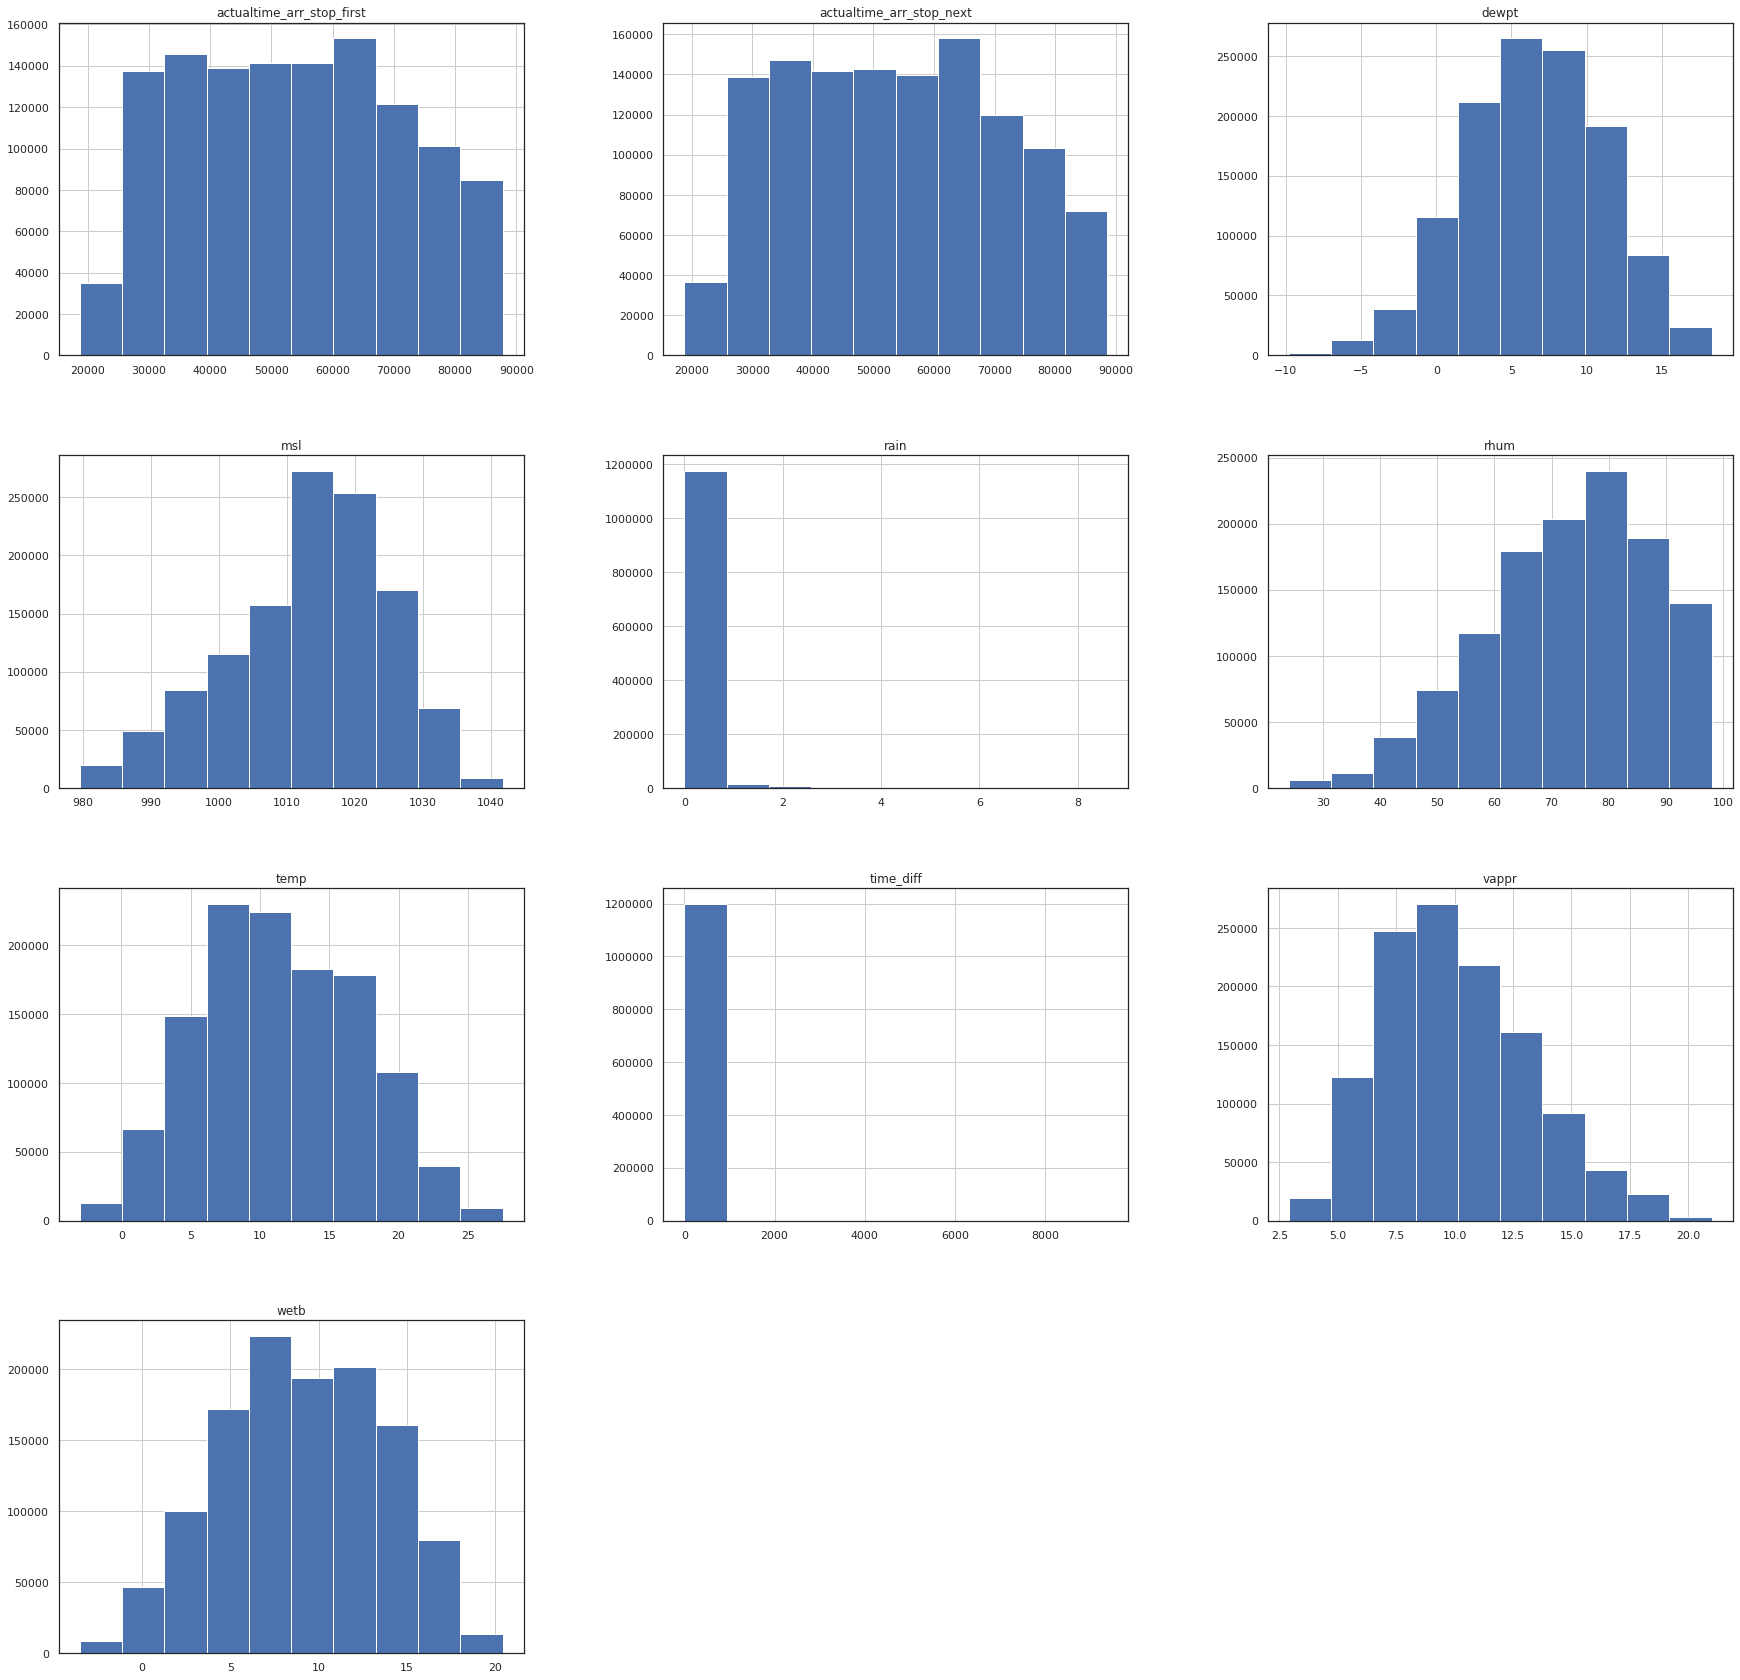

In [68]:
df_merged[continuous_columns].hist(figsize=(30,30))

## 10.2 Box Plots for the Continuous Features

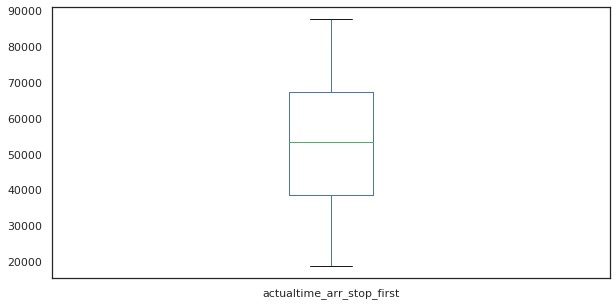

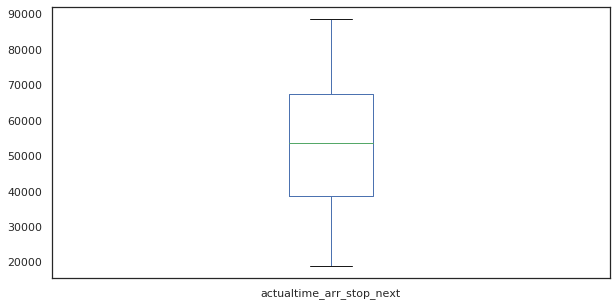

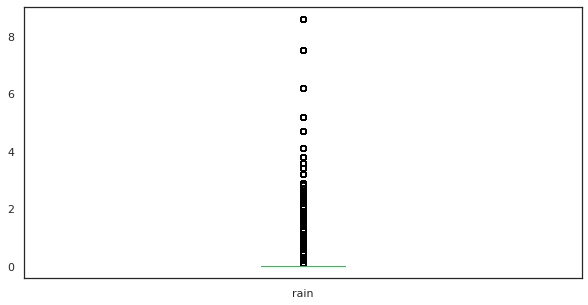

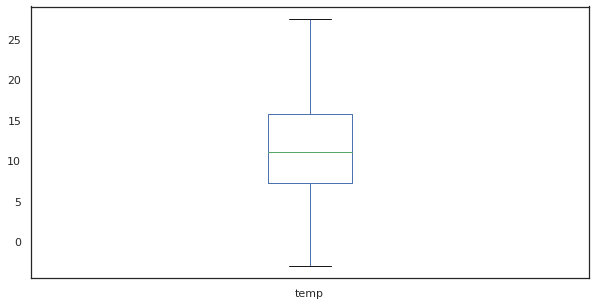

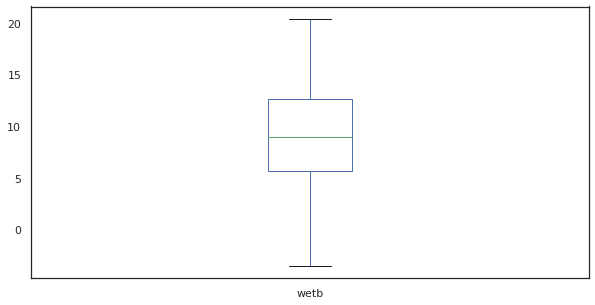

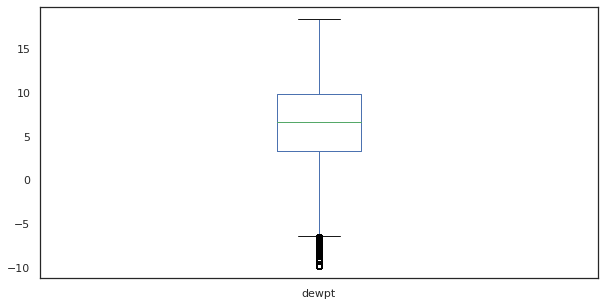

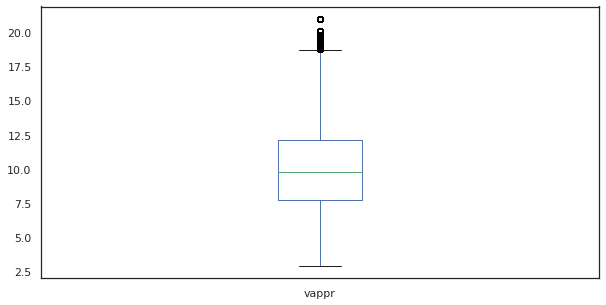

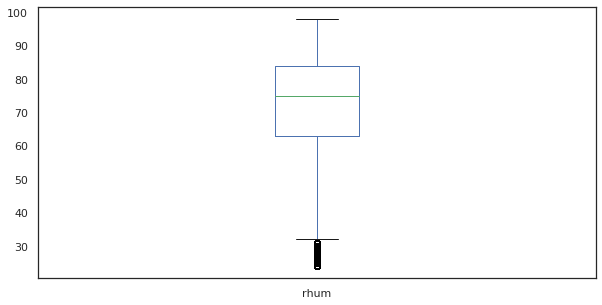

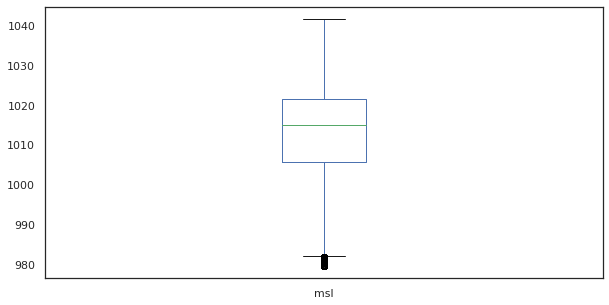

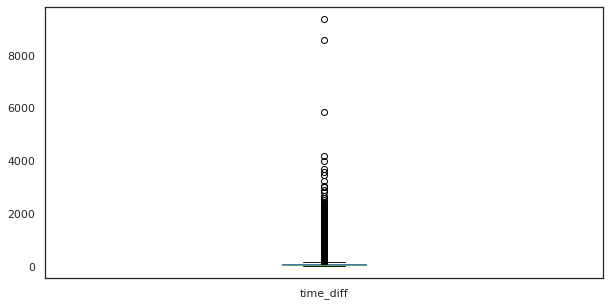

In [71]:
for col in continuous_columns:
    f = df_merged[col].plot(kind='box', figsize=(10,5))
    plt.show()

## 10.3 Bar Charts for the Categorical Features

In [74]:
# select the features to plot
# some categorical features will not be plotted here due to the high number of values e.g. bus stop no.
categorical_columns_plot = df_merged[['lineid', 'routeid', 'direction',  \
                          'month', 'day', 'hour', 'day_of_week', 'weekday', 'bank_holiday']].columns

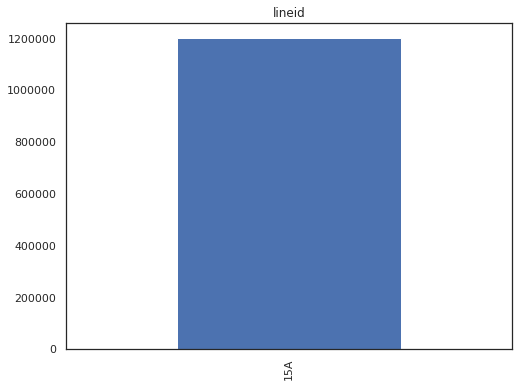

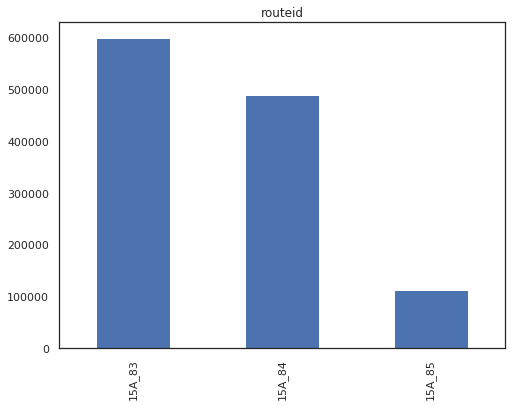

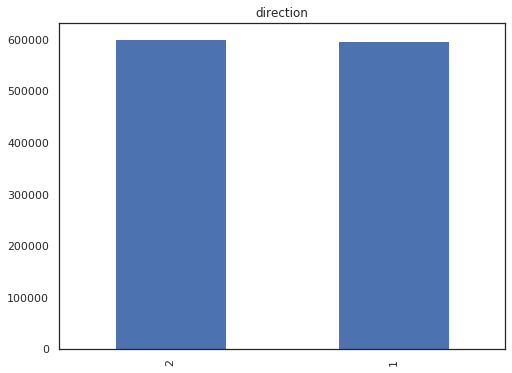

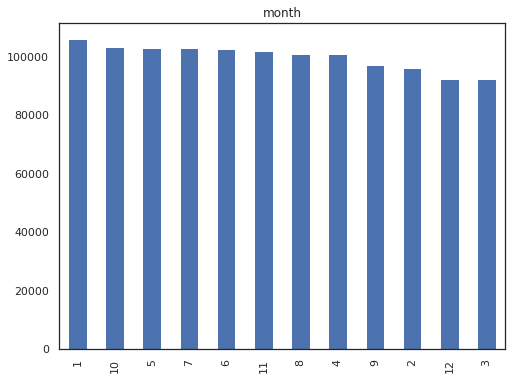

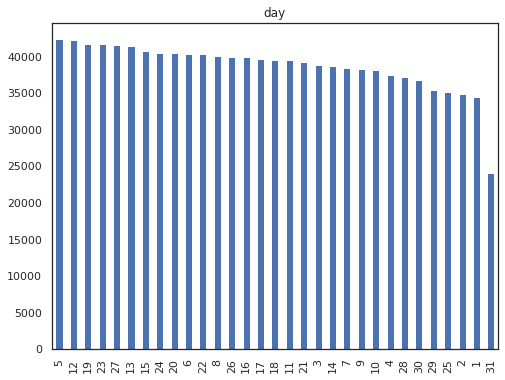

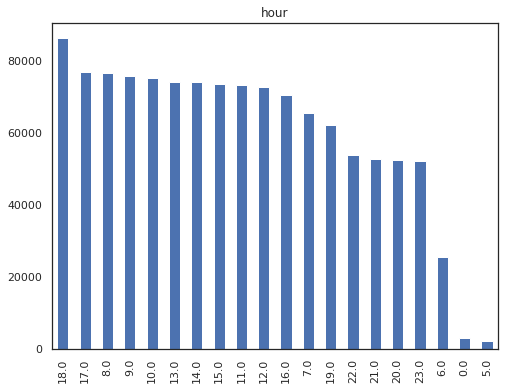

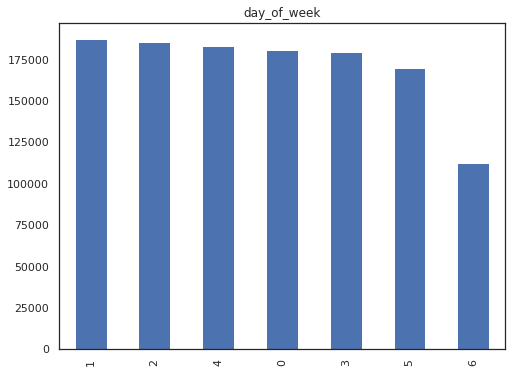

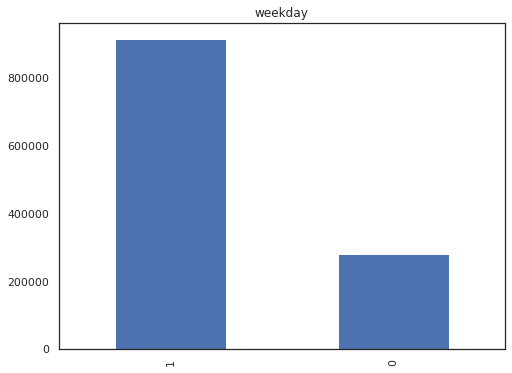

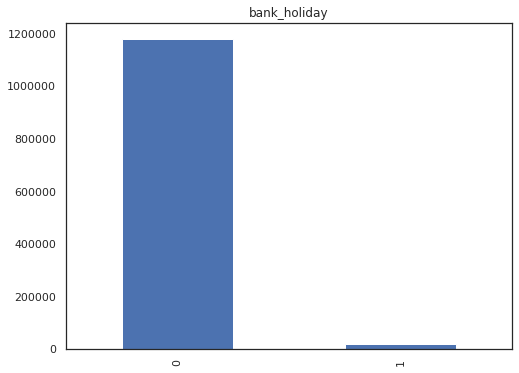

In [75]:
for column in categorical_columns_plot:
    f = df_merged[column].value_counts().plot(kind='bar', title=column, figsize=(8,6))
    plt.show()

## 10.4 Correlation Matrix for Continuous Features

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

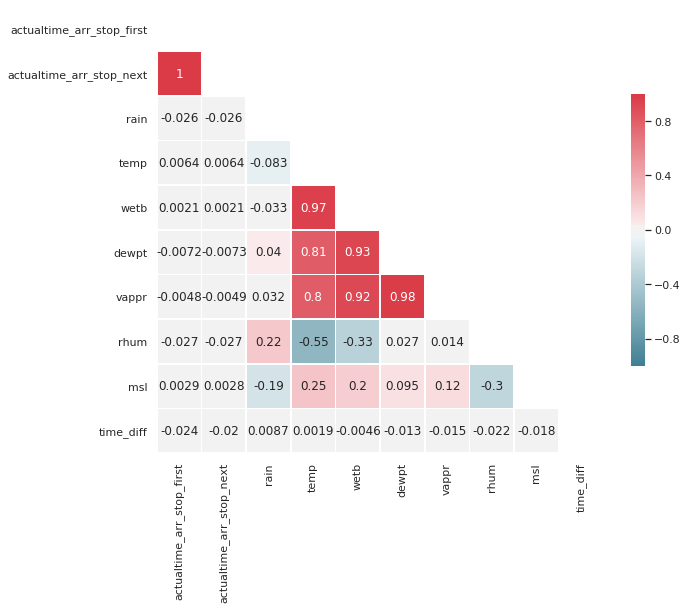

In [64]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Calculate correlation of all pairs of continuous features
corr = df_merged[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

We are mainly interested here in the correlation between the weather data and *time_diff* or *actualtime_arr_stop_next*. The correlation for these features with the weather data is quite low.

Some of the weather features have very high correlation with each other e.g. temp with wetb and vappr with dewpt. The weather features we can use will be dependent on what is available in the weather forecast we receive. However, if all features are available in the forecast we may need to remove some of the features due to high correlation.

## 10.5 Correlations between the Continuous Features & the Target Feature

We have two options for our target feature:

- actualtime_arr_stop_next
- time_diff

I will plot scatter plots for each.

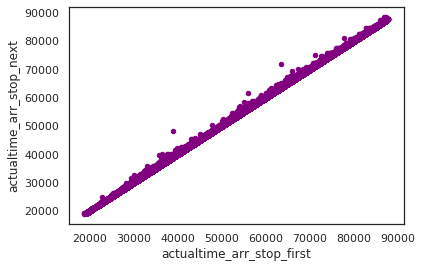

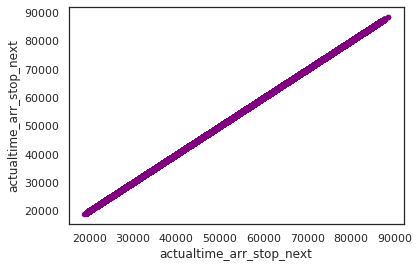

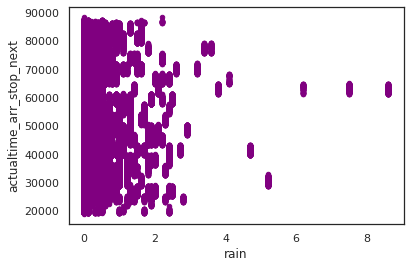

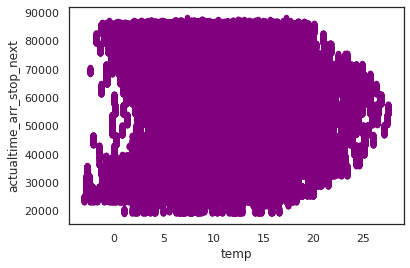

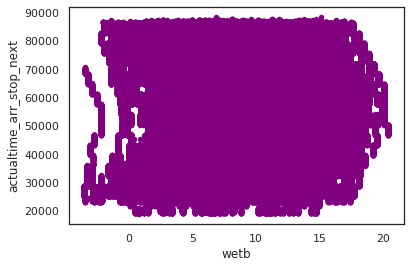

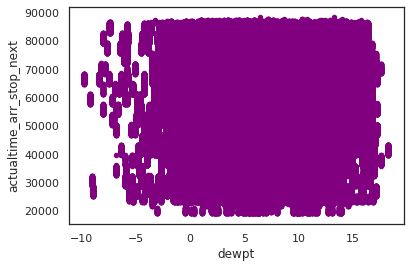

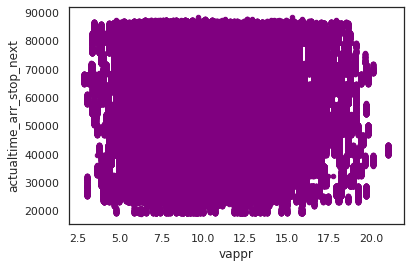

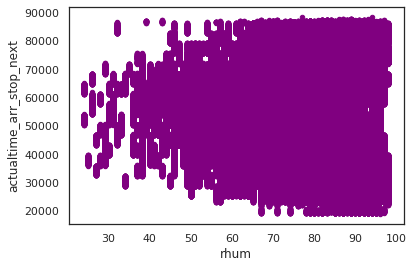

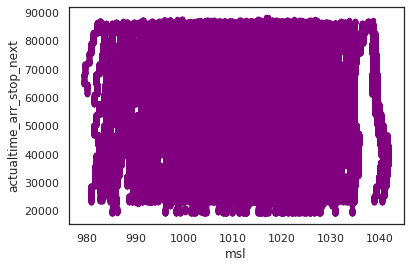

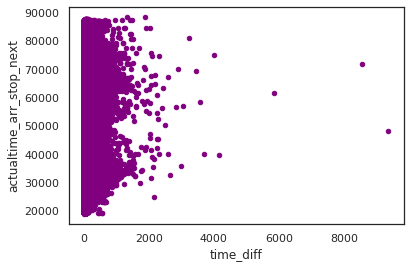

In [65]:
# print a scatter plot for each continuous feature against actualtime_arr_stop_next
for col in continuous_columns:
    df_merged.plot.scatter(x=col, y='actualtime_arr_stop_next', c='purple')

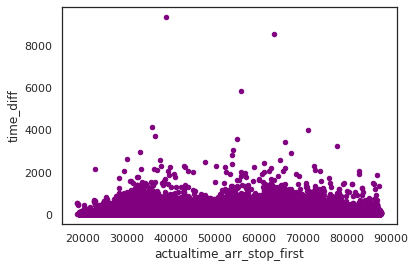

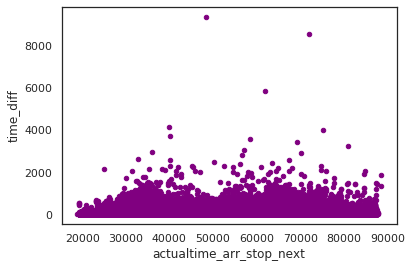

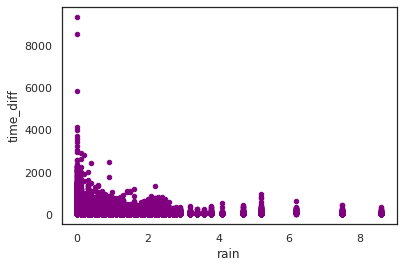

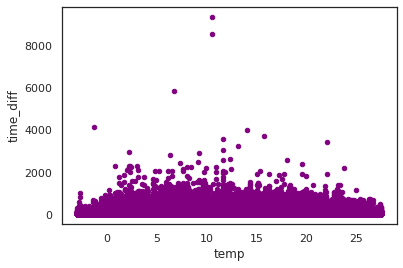

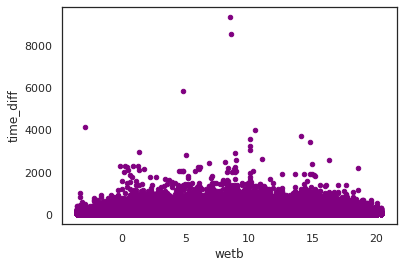

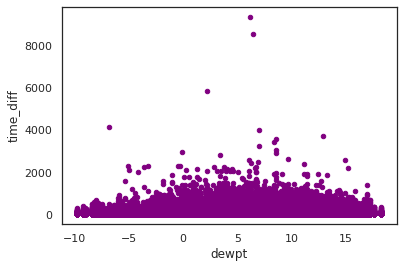

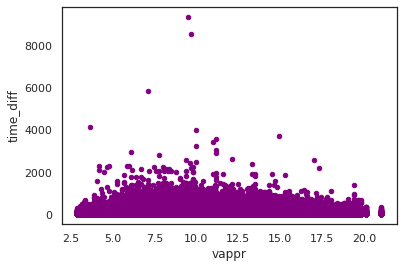

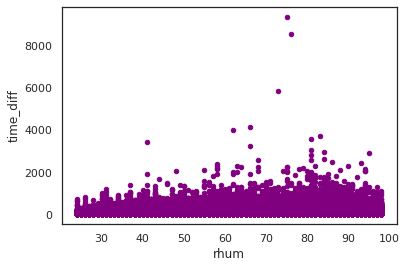

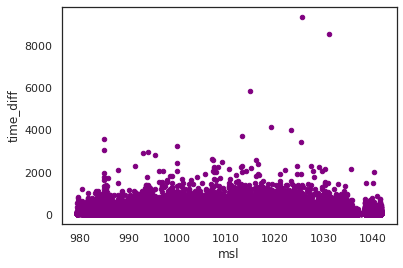

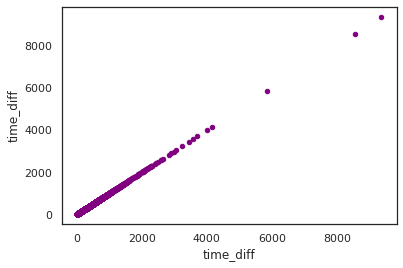

In [66]:
# print a scatter plot for each continuous feature against time_diff
for col in continuous_columns:
    df_merged.plot.scatter(x=col, y='time_diff', c='purple')

## 10.6 Correlations between the Categorical Features & the Target Feature

We have two options for our target feature:

- actualtime_arr_stop_next
- time_diff

I will plot box plots for each.

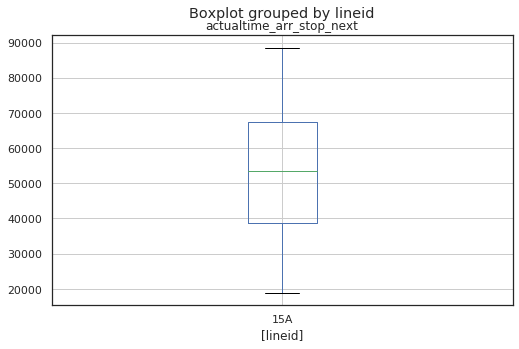

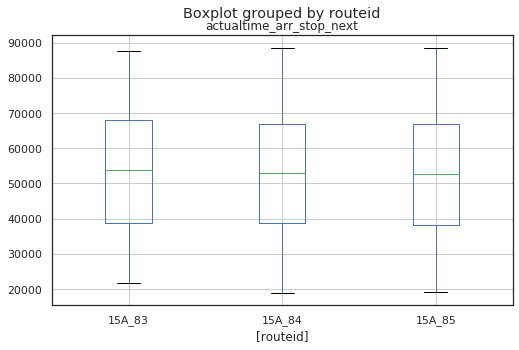

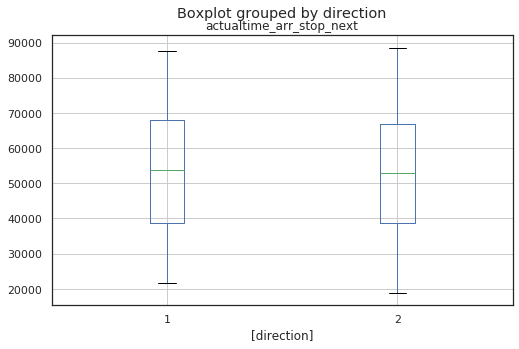

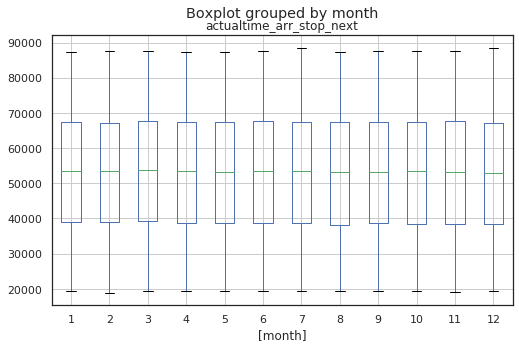

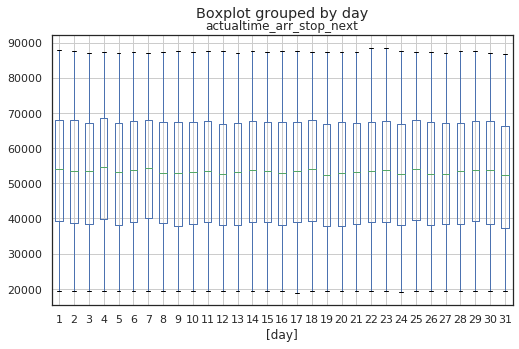

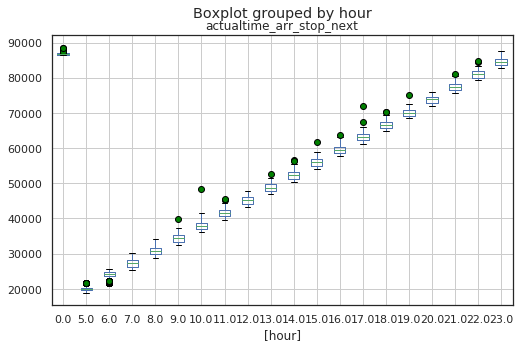

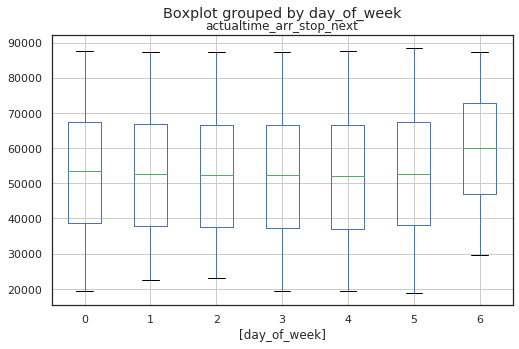

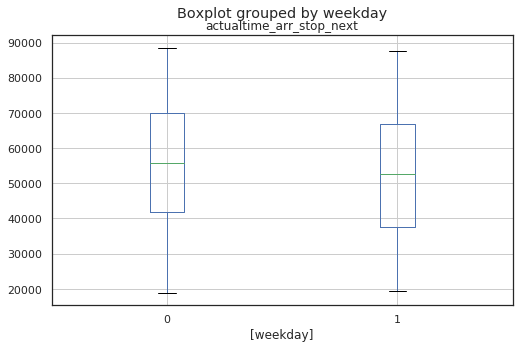

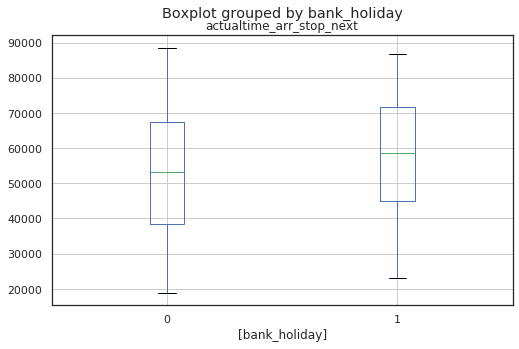

In [78]:
for col in categorical_columns_plot:
    df_merged.boxplot(column=['actualtime_arr_stop_next'], by=[col], flierprops=flierprops, figsize=(8,5))

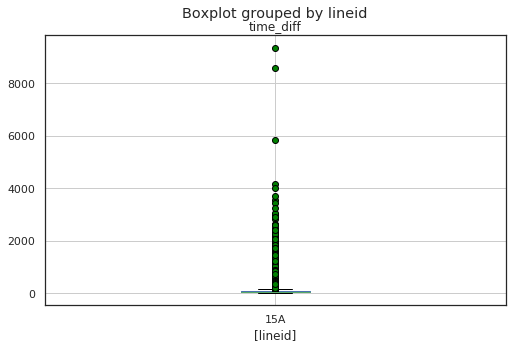

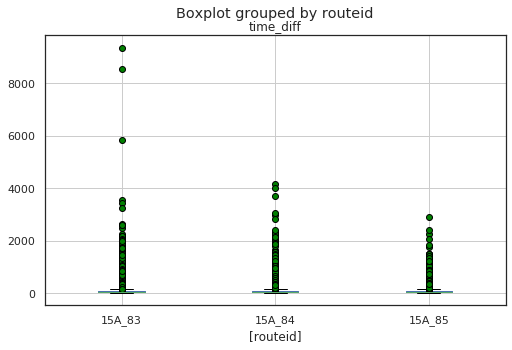

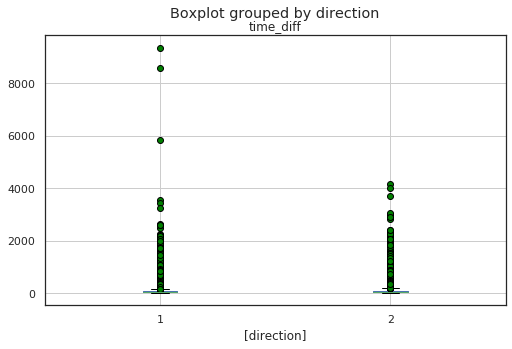

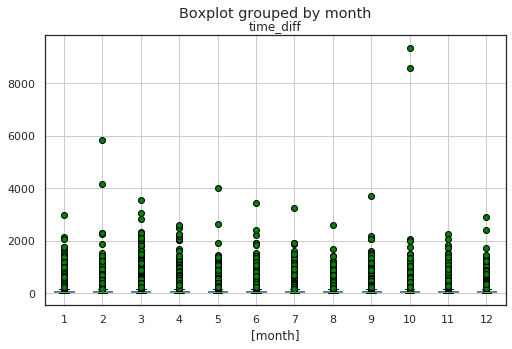

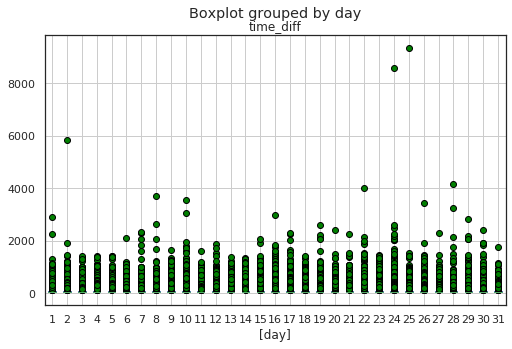

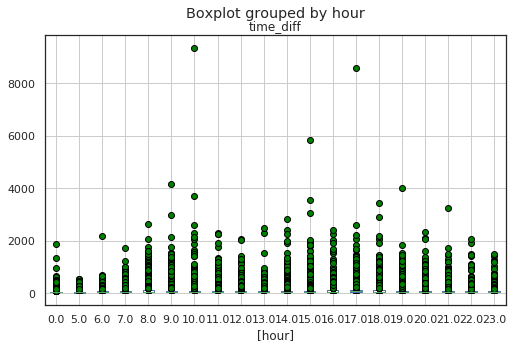

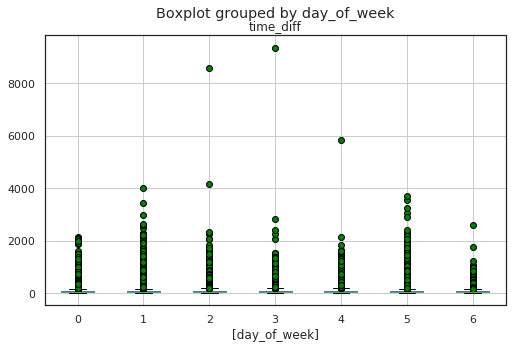

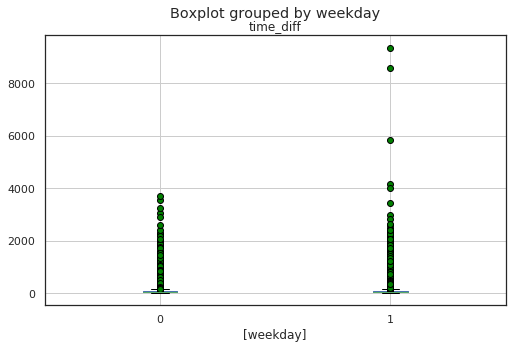

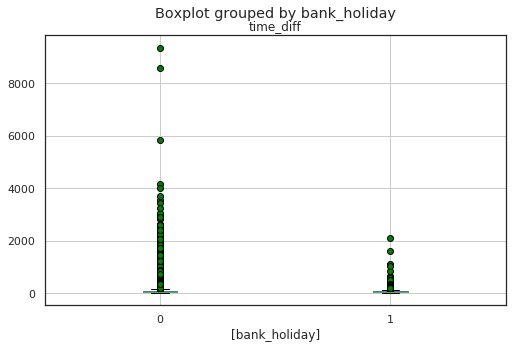

In [79]:
for col in categorical_columns_plot:
    df_merged.boxplot(column=['time_diff'], by=[col], flierprops=flierprops, figsize=(8,5))

# Appendix 1: Data Quality Plan - Bus Data (Before Transformation)

| Feature | Data Quality Issue | Handling Strategy |
|-------------------------|----------------------|------------------------------|
| tenderlot       | All rows are null | Drop feature |
| suppressed_trip | All rows are null | Drop feature |
| justificationid_trip | All rows are null | Drop feature |
| passengers | All rows are null | Drop feature | 
| passengersin | All rows are null | Drop feature |
| passengersout | All rows are null | Drop feature |
| distance_leavetimes | All rows are null | Drop feature |
| note_leavetimes | All rows are null | Drop feature |
| note_vehicle | All rows are null | Drop feature |
| datasource | Constant feature | Drop feature |
| lineid | Constant feature | This is constant because we just have data for one route loaded. At some point we may process more than one route together so will keep feature for now. May not be needed to train the model. |
| basin | Constant feature | Drop feature |
| lastupdate_trip | Cannot be used to train model as we won't be able to provide this information | Drop feature |
| note_trip | Cannot be used to train model as we won't be able to provide this information | Drop feature |
| suppressed_leavetimes | Cannot be used to train model as we won't be able to provide this information | Drop feature |
| justifcationid_leavetimes | Cannot be used to train model as we won't be able to provide this information | Drop feature |
| lastupdate_leavetimes | Cannot be used to train model as we won't be able to provide this information | Drop feature |
| vehicleid | Cannot be used to train model as we won't be able to provide this information | Drop feature |
| distance_vehicle | Cannot be used to train model as we won't be able to provide this information | Drop feature |
| minutes_vehicle | Cannot be used to train model as we won't be able to provide this information | Drop feature |
| actualtime_arr_trip | Missing values < 1% | Ignore for now as this feature is not brought across when data is transformed. |
| actualtime_dep_trip | Missing values < 3% | Ignore for now as this feature is not brought across when data is transformed. |

# Appendix 2: Data Quality Plan - Bus Data (After Transformation)

| Feature | Data Quality Issue | Handling Strategy |
|-------------------------|----------------------|------------------------------|
| stoppointid_first | Missing values ~ 1% | Drop affected rows |
| actualtime_arr_stop_first | Missing values ~ 1%| Drop affected rows |
| stoppointid_next | Missing values ~ 1% | Drop affected rows |
| actualtime_arr_stop_next | Missing values ~ 1%| Drop affected rows |

# Appendix 3: Data Quality Plan - Weather Data

| Feature | Data Quality Issue | Handling Strategy |
|-------------------------|----------------------|------------------------------|
| itemp | Constant feature | Drop feature |
| iwb | Constant feature | Drop feature |
| rain | Missing data - 2 rows | Imputation - replace with 0 after looking at data for other timestamps on the same day |
| irain | Seems to be a missing data indicator | Drop feature as only two rows have missing data, and imputation is performed for these rows. |

# Appendix 4: Data Quality Plan - After Merge

| Feature | Data Quality Issue | Handling Strategy |
|-------------------------|----------------------|------------------------------|
| time_diff | For 167 rows, this feature is zero or negative | Drop affected rows|
| All | Missing data for segment 1354 to 7578 due to stop 7589 no longer being on the route. | Decide on an approach - other routes may have data for this segment. If not, we may need to use timetable information or real time info to estimate travel time through this segment.  There is also the possibility of using times between 1354 and 7589 and 7589 and 7578 to approximate travel time, but we would need more info on where stop 7589 was to see if this would be valid to do. |

# Appendix 5: Tests for *transform_data*

In [ ]:
df_test1 = df.loc[5:100]
df_test1 = df_test1.reset_index(drop=True)
df_test1

In [ ]:
df_transformed1 = transform.transform_data(df_test1)
df_transformed1

In [ ]:
pieces = [df[:35], df[42:100]]
df_test2 = pd.concat(pieces)
df_test2 = df_test2.reset_index(drop=True)
df_test2

In [ ]:
df_transformed2 = transform.transform_data(df_test2)
df_transformed2

In [ ]:
pieces = [df[:5], df[10:100]]
df_test3 = pd.concat(pieces)
df_test3 = df_test3.reset_index(drop=True)
df_test3

In [ ]:
df_transformed3 = transform.transform_data(df_test3)
df_transformed3

In [ ]:
pieces = [df[:5], df[8:10], df[14:50]]
df_test4 = pd.concat(pieces)
df_test4 = df_test4.reset_index(drop=True)
df_test4

In [ ]:
df_transformed4 = transform.transform_data(df_test4)
df_transformed4